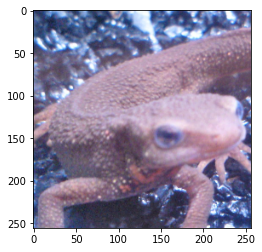

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

In [15]:
print(img_orig.shape)
print('==========================')
print(img_orig[..., :1].shape)

(256, 256, 3)
(256, 256, 1)


### Q.1 チャネル入れ替え

画像を読み込み、RGBをBGRの順に入れ替えよ。

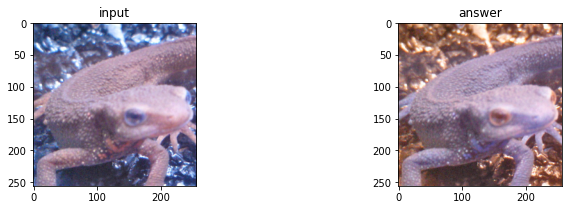

In [14]:
def rgb2bgr(img):
    # NumPyではEllipsis（...）を使うと配列ndarrayのインデックス[]で要素や範囲を指定するときに途中の次元を省略できる
    # インデックスの最初から最後までステップ-1
    return img[..., ::-1]

img_bgr = rgb2bgr(img_orig)
    
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

### Q.2 グレイスケール

画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Grayscale = 0.2126 R + 0.7152 G + 0.0722 B

それぞれの係数は人間の視覚の敏感さであり、Gに人間の最も強く反応し、Bにはあまり反応しないことを示す。

(256, 256)


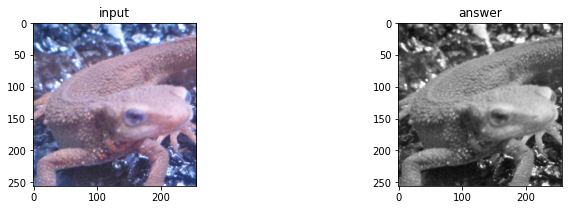

In [16]:
# answer
def rgb2gray(img):
    _img = img.copy().astype(np.float32)
    gray = _img[..., 0] * 0.2126 + _img[..., 1] * 0.7152 + _img[..., 2] * 0.0722
    gray = np.clip(gray, 0, 255)
    return gray.astype(np.uint8)

img_gray = rgb2gray(img_orig)
print(img_gray.shape)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

### Q.3 二値化

画像を二値化せよ。 二値化とは、画像を特定の値を閾値として黒と白の二値で表現する方法である。 ここでは、

1. グレースケール化
2. 閾値を128にして二値化する。

$ y = \begin{cases} 0 & (if , x < th) \ 255 & (otherwise) \end{cases} $

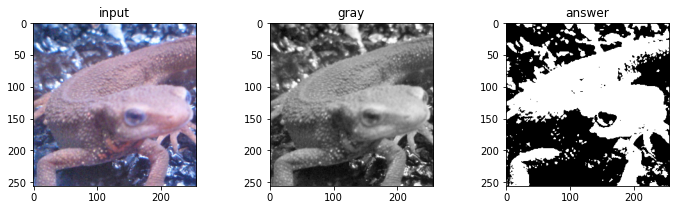

In [17]:
# answer
def binary(img, th):
    _img = img.copy()
    _img = np.minimum(_img // th, 1) * 255
    return _img.astype(np.uint8)

img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_bin = binary(img_gray, 127)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

### Q.4 大津の二値化

大津の二値化を実装せよ。 ここでは、

1. グレースケール化
2. 大津の二値化

大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する教師なし手法である。 これはクラス内分散とクラス間分散の比から計算される。

以下原理の説明。

まず、グレースケールの輝度値（ピクセルの値）のヒストグラムはこうなる。ここで赤線を閾値として、左側をクラス0、右側をクラス1として、この二つのクラスがバランスよく分離できれば良い二値化といえる。よって、クラス0と1の分離度を定義する。

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_01_10/images/output_11_0.png"/>

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_01_10/images/otsu_bin_equ.png"/>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


threshold >> 129


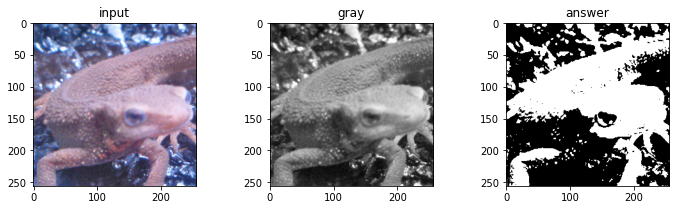

In [18]:
def otsu_thresh(img):
    max_vari = -1
    max_th = 0
    for th in range(1, 254):
        m0 = img[img <= th].mean() # mean class 0
        m1 = img[img > th].mean() # mean class 1
        w0 = img[img <= th].size # pixel num class 0
        w1 = img[img > th].size # pixel num class 1
        vari = w0 * w1 / ((w0 + w1) ** 2) * ((m0 - m1) ** 2) # inter class variance
        if vari > max_vari:
            max_th = th
            max_vari = vari
            
    img = binary(img, max_th)
            
    return max_th, img

th, img_bin = otsu_thresh(img_gray)
print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

### Q.5 HSV変化

HSV変換を実装して、色相Hを反転（Hを180度反転）せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

- Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0 <= S < 1)
- Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
- Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 1) 色相は次の色に対応する。

ここでHueをとるのとRGBをとるのは何が違うかというと、色成分をとる時に違う、RGBでは 万次元をとるため、緑を取りたいと思っても、範囲指定が複雑になる（G > 200 としてもRやBが200以上なら見た目が緑とは限らないから）。　逆にHueでは360次元で値をとるため、緑の指定が簡単になる。これを上手く活用できれば色成分の抽出が簡単に行えることもある。

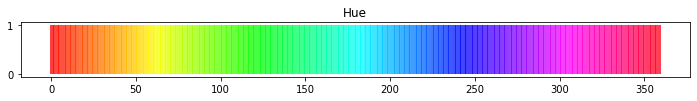

In [19]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_01_10/images/hsv_equ.png" width="500"/>

として、

$ (R, G, B) = (V - S) + \begin{cases} (S, X, 0) & ({\rm if} , 0 \leq H' < 1) \ (X, C, 0) & ({\rm if} , 1 \leq H' < 2) \ (0, C, X) & ({\rm if} , 2 \leq H' < 3) \ (0, X, C) & ({\rm if} , 3 \leq H' < 4) \ (X, 0, C) & ({\rm if} , 4 \leq H' < 5) \ (C, 0, X) & ({\rm if} , 5 \leq H' < 6) \ \end{cases} $

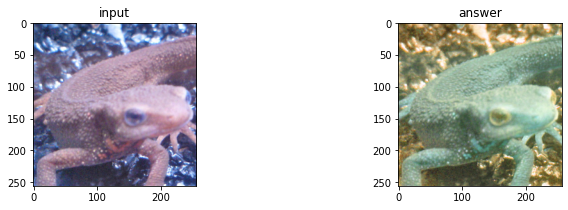

In [20]:
# answer
def rgb2hsv(img):
    _img = img.copy().astype(np.float32)# / 255
    v_max = _img.max(axis=2)
    v_min = _img.min(axis=2)
    v_argmin = _img.argmin(axis=2)
    hsv = np.zeros_like(_img, dtype=np.float32)
    r, g, b = np.split(_img, 3, axis=2)
    r, g, b = r[..., 0], g[..., 0], b[..., 0]

    diff = np.maximum(v_max - v_min, 1e-10)
    
    # Hue
    ind = v_argmin == 2
    hsv[..., 0][ind] = 60 * (g - r)[ind] / diff[ind] + 60
    ind = v_argmin == 0
    hsv[..., 0][ind] = 60 * (b - g)[ind] / diff[ind] + 180
    ind = v_argmin == 1
    hsv[..., 0][ind] = 60 * (r - b)[ind] / diff[ind] + 300
    ind = v_max == v_min
    hsv[..., 0][ind] = 0
    # Saturation
    hsv[..., 1] = v_max - v_min
    # Value
    hsv[..., 2] = v_max
    return hsv

def hsv2rgb(hsv):
    h, s, v = np.split(hsv, 3, axis=2)
    h, s, v = h[..., 0], s[..., 0], v[..., 0]
    _h = h / 60
    x = s * (1 - np.abs(_h % 2 - 1))
    z = np.zeros_like(x)
    vals = np.array([[s, x, z], [x, s, z], [z, s, x], [z, x, s], [x, z, s], [s, z, x]])
    
    img = np.zeros_like(hsv)
    
    for i in range(6):
        ind = _h.astype(int) == i
        for j in range(3):
            img[..., j][ind] = (v - s)[ind] + vals[i, j][ind]
            
    return np.clip(img, 0, 255).astype(np.uint8)
   
hsv = rgb2hsv(img_orig) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 180) % 360 # Hue of opencv is defined [0, 180]
img_hsv = hsv2rgb(hsv) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

#### H, S, Vをそれぞれ見てみる

- S：イモリ自体の色が茶色だから値が低くなっている
- V：同じイモリの色でも光が当たっている部分は値が大きくなっている。逆に影は値が小さい。これなら光の当たり具合などが取れそうだ


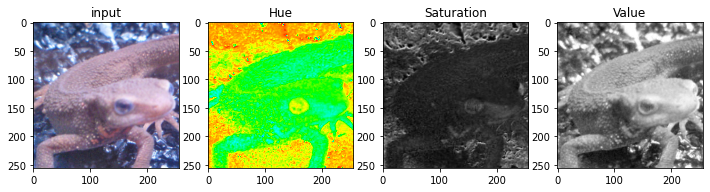

In [21]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1, 4, 2)
plt.title('Hue')
plt.imshow(hsv[..., 0] / 360, cmap='hsv')

plt.subplot(1, 4, 3)
plt.title('Saturation')
plt.imshow(hsv[..., 1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Value')
plt.imshow(hsv[..., 2], cmap='gray')

plt.show()

### Q.6 減色処理

### Q.7 平均プーリング

### Q.8 最大プーリング

### Q.9 ガウシアンフィルタ

### Q.10 メディアンフィルタ